In [83]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# Web scraping using BeautifulSoup 

## Get the list of movie title and ID for year 2018

### Play around example

In [5]:
url = 'https://www.imdb.com/search/title/?title_type=feature&year=2018-01-01,2018-12-31'

In [6]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [56]:
llist = soup.find_all('h3')

In [89]:
movie = []
ID = []
for x in llist[:50]:
    for y in x.find_all('a'):
        movie.append(y.text)
        ID.append(y.attrs['href'])

In [90]:
ID[:10]

['/title/tt1477834/',
 '/title/tt6533240/',
 '/title/tt7040874/',
 '/title/tt6628394/',
 '/title/tt1727824/',
 '/title/tt4633694/',
 '/title/tt4154756/',
 '/title/tt1571234/',
 '/title/tt4912910/',
 '/title/tt7959026/']

## Scrap 10000 movies

There are 50 movies in each pages, we need to iterate scraping.

In [107]:
movie = []
ID = []
for i in range(1,10000,50):
    base_url = 'http://www.imdb.com/search/title'

    # construct the parameter arguments
    params = dict(start=i, title_type='feature', year='2018-01-01,2018-12-31')
    
    response = requests.get(base_url,params=params)
    
    soup = BeautifulSoup(response.text, 'lxml')
    
    llist = soup.find_all('h3')

    for x in llist[:50]:
        for y in x.find_all('a'):
            movie.append(y.text)
            ID.append(y.attrs['href'])
    
    #running helper
    if i%500==1:
        print('getting',i,'movies')

getting 1 movies
getting 501 movies
getting 1001 movies
getting 1501 movies
getting 2001 movies
getting 2501 movies
getting 3001 movies
getting 3501 movies
getting 4001 movies
getting 4501 movies
getting 5001 movies
getting 5501 movies
getting 6001 movies
getting 6501 movies
getting 7001 movies
getting 7501 movies
getting 8001 movies
getting 8501 movies
getting 9001 movies
getting 9501 movies


In [108]:
data = pd.DataFrame({'title':movie,'ID':ID})
data.head()

,title,ID
0,Aquaman,/title/tt1477834/
1,Night Hunter,/title/tt6533240/
2,A Simple Favor,/title/tt7040874/
3,Bad Times at the El Royale,/title/tt6628394/
4,Bohemian Rhapsody,/title/tt1727824/


In [112]:
data['ID'] = data['ID'].apply(lambda x:x[7:-1])

In [114]:
data.to_csv('movie_2018_10000.csv')

# Scarp reviews

### Play around

In [115]:
url = 'https://www.imdb.com/title/tt5117428/reviews'

In [116]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Another way to get review data!  With '_ajax' folder

In [186]:
url = 'https://www.imdb.com/title/tt5117428/reviews/_ajax?paginationKey=null'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [188]:
rev_list = soup.find_all('div',{'class':"lister-item mode-detail imdb-user-review collapsable"})

In [200]:
# find rating 
rating = rev_list[0].find_all('span')[1].text
rating 

'8'

In [205]:
# find the review ID
reviewid = rev_list[0].attrs['data-review-id']
reviewid

'rw5019448'

In [214]:
# find the review title
review_title = rev_list[0].find('a',{'class':'title'}).text
review_title

' Three chords and the truth\n'

In [220]:
# find the reviewer name
reviewer_name = rev_list[0].find("span",{ 'class':'display-name-link'}).text
reviewer_name

'FrenchEddieFelson'

In [224]:
# find the reviewer ID
reviewer_id = rev_list[0].find("span",{ 'class':'display-name-link'}).find('a').attrs['href']
reviewer_id

'/user/ur3257585/'

In [228]:
#find review text
review_text = rev_list[0].find('div',{ 'class':"text show-more__control"}).text
review_text

"A young Scottish woman comes out of prison with the firm intention of fulfilling her dream and becoming a country singer in Nashville, Tennessee. Despite a bank account desperately empty. Despite two very young children she pathetically neglects.The frontier between stubbornness and motivation is often very blurred and it is only a posteriori that one can judge, even if many external factors, perceptible or not, can influence the course of events. And, without unduly spoiling the script, I was expecting a sad ending. Moreover, the atmosphere of Wild Rose (2018) quite often resembles those of Ken Loach's films with this inevitability that seems inescapable.A very pleasant surprise!"

In [265]:
#find review vote 
review_vote = rev_list[0].find('div', {'class':"actions text-muted"}).text
review_vote

'\n                    17 out of 22 found this helpful.\n                        \n                            Was this review helpful?  Sign in to vote.\n                        \n\nPermalink\n'

In [316]:
# find review data
reveiw_date = rev_list[0].find('div', {'class':"display-name-date"}).find_all('span')[1].text

'26 July 2019'

In [324]:
review_rating = []
review_id = []
review_title = []
review_text = []
review_vote = []
review_date = []

reviewer_id = []
reviewer_name = []

for movie in rev_list:
    # get review info
    review_rating.append(movie.find_all('span')[1].text)
    review_title.append(movie.find('a',{'class':'title'}).text)
    review_id.append(movie.attrs['data-review-id'])
    review_text.append(movie.find('div',{ 'class':"text show-more__control"}).text)
    review_vote.append(movie.find('div', {'class':"actions text-muted"}).text)
    review_date.append(movie.find('div', {'class':"display-name-date"}).find_all('span')[1].text)
    
    # get reviewer info
    reviewer_name.append(movie.find("span",{ 'class':'display-name-link'}).text)
    reviewer_id.append(movie.find("span",{ 'class':'display-name-link'}).find('a').attrs['href'])

# pack each column in to DataFrame
review_df = pd.DataFrame({ 'review_rating' : review_rating,
                'review_id' : review_id,
                'review_title' : review_title,
                'review_text' : review_text,
                'review_vote' : review_vote,
                'review_date' : review_date,
                'reviewer_id' : reviewer_id,
                'reviewer_name' :reviewer_name})
# adjust some column
review_df['review_upvote'] = review_df['review_vote'].apply(lambda x: re.findall(r'\d+',x)[0])
review_df['review_totalvote'] = review_df['review_vote'].apply(lambda x: re.findall(r'\d+',x)[1])
review_df['reviewer_id'] = review_df['reviewer_id'].apply(lambda x:x.split('/')[2])
review_df['review_title'] = review_df['review_title'].apply(lambda x:x.replace('\n',''))
review_df = review_df.drop('review_vote',axis=1)
review_df['review_date'] = pd.to_datetime(review_df['review_date'])

In [325]:
review_df

,review_rating,review_id,review_title,review_text,review_date,reviewer_id,reviewer_name,review_upvote,review_totalvote
0,8,rw5019448,Three chords and the truth\n,A young Scottish woman comes out of prison wit...,2019-07-26,ur3257585,FrenchEddieFelson,17,22
1,7,rw4760496,Three chords and the truth.\n,"BAFTA named Jessie Buckley as one of their ""Ri...",2019-04-03,ur49208568,bob-the-movie-man,23,43
2,8,rw4732449,Full of heart\n,The whole story was excellently portrayed. Buc...,2019-03-19,ur78018459,muamba_eats_toast,21,41
3,10,rw4752754,Movie of the year!\n,The best movie of the year : I'm still buzzing...,2019-03-30,ur19727129,Chatblater009,19,38
4,6,rw4838867,3 chords and the obvious cliches\n,Wild Rose 🥀 a film about Country and Western m...,2019-05-09,ur92838119,fostrhod,16,32
5,10,rw4676541,Really enjoyed\n,For once a film with an amazing lead singer! W...,2019-02-20,ur97693911,jadecalvert-21621,16,35
6,8,rw4733708,A funny and sad drama with some truly great a...,The story isn't that original in concept and h...,2019-03-20,ur93138442,sbweightman,15,33
7,10,rw5048805,"Wow chills down my spine, what a performance ...","A down to earth realistic , good and bad story...",2019-08-09,ur96055061,onlinevirtual,5,9
8,9,rw5032683,Three Chords and the Truth\n,For a long time I always said that crime thril...,2019-08-01,ur39517558,ThomasDrufke,4,7
9,7,rw4691279,"A wonderful rose, surrounded by thorns.\n","Wild Rose is not a movie I'd ever watch, but I...",2019-02-28,ur71354360,jditch,12,32


#### Use Selenium to exact review Key for 'Load more'

Need paginationKey for next page

In [152]:
from selenium import webdriver

In [359]:
browser = webdriver.Chrome()
browser.get('https://www.imdb.com/title/tt5117428/reviews/')

In [360]:
browser.find_element_by_class_name('article').find_element_by_class_name('load-more-data').get_attribute('data-key')

'6n3bvy5umfh7vznwg4p633gm3dirij2mh5ess6bpsecy3hsdvgcf6lk5m4gsnhnt3b2noq72t3cmw'

This key is need to stored then use for scraping

In [364]:
elem = browser.find_element_by_class_name('article').find_element_by_class_name('ipl-load-more__button')

In [365]:
elem.click()

In [366]:
browser.find_element_by_class_name('article').find_element_by_class_name('load-more-data').get_attribute('data-key')

In [367]:
browser.close()

### Pipline

The helper function can be packed into a python script

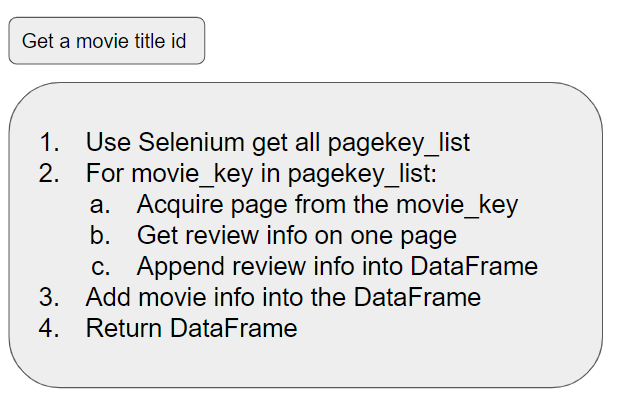

In [394]:
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec 
from selenium.webdriver.common.by import By

In [430]:
class element_has_change(object):
    """An expectation for checking that an element has a new 'data-key'.

    locator - used to find the element
    returns True if new key has been assigned
    """
    def __init__(self, locator, past_key):
        self.locator = locator
        self.past_key = past_key

    def __call__(self, driver):
        element = driver.find_element(*self.locator)   # Finding the referenced element
        if self.past_key is element.get_attribute("data-key"):
            return False
        else:
            return True

In [454]:
browser = webdriver.Chrome()

In [465]:
def get_pagekey_list(browser,movie_id):
    """
    this function use selenium to click on the "Load more" button on the IMDB movie review page,
    and load page key for the ajax
    
    arg:
        browser: webdriver object,  e.g. webdriver.Chrome()
        movie_id: movie id start from tt, e.g. 'tt1477834'
    
    return:
        a list of page keys
    """
    url = 'https://www.imdb.com/title/'+movie_id+'/reviews/?ref_=tt_urv'
    browser.get(url)
    pagekey_list = []
    wait = WebDriverWait(browser,2)
    #wait.until(ec.element_to_be_clickable((By.ID,'load-more-trigger')))
    pagekey = 'null'
    
    # load 5000 pages as the max.
    for i in range(50):
        try:
            wait.until(element_has_change((By.CLASS_NAME,'load-more-data'),pagekey))
        except:
            print('Wait too long to load the new key')
            print('key'+pagekey)
            break
        finally:
            pagekey = browser.find_element_by_class_name('article').find_element_by_class_name('load-more-data').get_attribute('data-key')
            pagekey_list.append(pagekey) 

        try:
            wait.until(ec.element_to_be_clickable((By.ID,'load-more-trigger')))
        except:
            pass
            #print('Cannot find Load More')
        finally:
            try:
                elem = browser.find_element_by_class_name('article').find_element_by_class_name('ipl-load-more__button')
                elem.click()
            except:
                break
    
    #insert null for the 1st page
    pagekey_list[0]='null'
    
    return pagekey_list
#pagekey_list = get_pagekey_list(browser,'tt1477834')
#pagekey_list

#### Save Movie list

In [551]:
import json

def creat_movie_link_list(path,start,end):
    """
    This function will load the review links for each move given the title list,
    and save into the path.
    
    arg:
        path : path to save the json file, 'movie_link_2.json'
        start : scraping start   , e.g. 0
        end : scraping end,     e.g. 500
    
    return:
        
    
    """
    # read the csv file with movie title and movie ID
    movie_list = pd.read_csv('movie_2018_10000.csv')
    
    #initial webdriver
    browser = webdriver.Chrome()
    
    #initial the movie_link dictionary
    try:
        with open(path) as json_file:
            movie_link = json.load(json_file)
    except:
        movie_link = {}
    
    count = start
    
    for movie_id in movie_list['ID'][start:end].values:
        print('No.'+str(count)+' ' + movie_id)
        count += 1
        #load list for single movie
        pagekey_list = get_pagekey_list(browser,movie_id)
        
        movie_link[movie_id] = pagekey_list
        
        # write file
        with open(path, 'w') as outfile:
            json.dump(movie_link, outfile)
        
    browser.close()


In [552]:
creat_movie_link_list('movie_link_2.json',500,1000)

No.1 tt5979872
No.2 tt7338690
No.3 tt7886614
No.4 tt5622412
No.5 tt7745068
No.6 tt7149916
No.7 tt7725596
No.8 tt6197494
No.9 tt2728784
No.10 tt1235187
No.11 tt7456534
No.12 tt8523334
No.13 tt6046314
No.14 tt5304996
No.15 tt8020896
No.16 tt6729000
No.17 tt5473090
No.18 tt8439854
No.19 tt4411234
No.20 tt7451284
No.21 tt6942194
No.22 tt8055888
No.23 tt7279188
No.24 tt5935704
No.25 tt6878882
No.26 tt6933454
No.27 tt8307082
No.28 tt3201736
No.29 tt5589362
No.30 tt7158430
No.31 tt4642192
No.32 tt6984258
No.33 tt6884200
No.34 tt8956390
No.35 tt7318202
No.36 tt6518270
No.37 tt5639446
No.38 tt5779372
No.39 tt4638148
No.40 tt6613878
No.41 tt5031658
No.42 tt7167630
No.43 tt6290798
No.44 tt6710826
No.45 tt6704776
No.46 tt7220754
No.47 tt6426028
No.48 tt7448180
No.49 tt5267472
No.50 tt5475734
No.51 tt7044076
No.52 tt6531196
No.53 tt8351882
No.54 tt7188978
No.55 tt6452574
No.56 tt7489816
No.57 tt4266076
No.58 tt6170506
No.59 tt7163824
No.60 tt7959216
No.61 tt6215446
No.62 tt5371168
No.63 tt6807324
N

No.490 tt7534068
No.491 tt8202612
No.492 tt8488542
No.493 tt5378092
No.494 tt7613996
No.495 tt8065796
No.496 tt7471884
No.497 tt8951086
No.498 tt2936390
No.499 tt4224754
No.500 tt6023386


In [674]:
def get_review_info(movie_id,pagekey):
    """
        This function load the review infomation given the page key (one page)
        
        arg:
            movie_id: IMDB ID for the movie, e.g. 'tt5867226'
            pagekeye: pagekey extracted from the page _ajax , 
                  e.g. "dtn25hnsjdppno3tc6xju4bnmyxwim3aypag3nfykip3qgelej7qjdsxcqlvlvr242tkli3ikkmee"
            
        return:
            DataFrame with all review information (one page, about 20 rows)
    """
    # get page based on the pagekey and movie_id using BeautifulSoup
    if pagekey == 'null':
        pagekey = ''
    url = 'https://www.imdb.com/title/'+ movie_id + '/reviews/_ajax?paginationKey='+ pagekey
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    
    # segment all movie review in the list
    rev_list = soup.find_all('div',
                             {'class':"lister-item mode-detail imdb-user-review collapsable"})
    
    #initiation of all columns
    review_rating = []
    review_id = []
    review_title = []
    review_text = []
    review_vote = []
    review_date = []

    reviewer_id = []
    reviewer_name = []
    
    #interate review in the list of the movie reviews
    for movie in rev_list:
        # get review info
        review_rating.append(movie.find_all('span')[1].text)
        review_title.append(movie.find('a',{'class':'title'}).text)
        review_id.append(movie.attrs['data-review-id'])
        review_text.append(movie.find('div',{ 'class':"text show-more__control"}).text)
        review_vote.append(movie.find('div', {'class':"actions text-muted"}).text)
        review_date.append(movie.find('div', {'class':"display-name-date"}).find_all('span')[1].text)

        # get reviewer info
        reviewer_name.append(movie.find("span",{ 'class':'display-name-link'}).text)
        reviewer_id.append(movie.find("span",{ 'class':'display-name-link'}).find('a').attrs['href'])

    # pack each column in to DataFrame
    review_df = pd.DataFrame({ 'review_rating' : review_rating,
                    'review_id' : review_id,
                    'review_title' : review_title,
                    'review_text' : review_text,
                    'review_vote' : review_vote,
                    'review_date' : review_date,
                    'reviewer_id' : reviewer_id,
                    'reviewer_name' :reviewer_name})
    # adjust some columns
    review_df['review_upvote'] = review_df['review_vote'].apply(lambda x: re.findall(r'\d+',x.replace(',',''))[0])
    review_df['review_totalvote'] = review_df['review_vote'].apply(lambda x: re.findall(r'\d+',x.replace(',',''))[1])
    review_df['reviewer_id'] = review_df['reviewer_id'].apply(lambda x:x.split('/')[2])
    review_df['review_title'] = review_df['review_title'].apply(lambda x:x.replace('\n',''))
    review_df = review_df.drop('review_vote',axis=1)
    review_df['review_date'] = pd.to_datetime(review_df['review_date'])
    
    return review_df

In [675]:
get_review_info('tt1477834','null')

,review_rating,review_id,review_title,review_text,review_date,reviewer_id,reviewer_name,review_upvote,review_totalvote
0,6,rw4517363,Is it just me?,What's with the 10 out of 10 reviews? really?....,2018-12-17,ur30969370,shopping-277-112148,1485,2198
1,3,rw4583916,More cheese than I can handle,"If you are a preteen, the story may work for y...",2019-01-15,ur23757827,Jack_C_,751,1111
2,2,rw4516155,Every superhero movie cliche you can imagine,I have no idea why somebody would give this mo...,2018-12-16,ur34843849,McLovin4420,1517,2315
3,4,rw4565143,The most overrated generic superhero film you...,I don't know where the hype for this film come...,2019-01-06,ur81810719,borismk-38942,770,1187
4,4,rw4587142,"Aquaman vs powwerrangers, starwars, godzilla ...","C'mon, 10/10 seriously? the director used ever...",2019-01-17,ur63943910,ekleins,495,791
5,26 January 2019,rw4607878,Everything But The Kitchen Sink,"Everything I saw, read and heard about 'Aquama...",2019-01-26,ur15794099,gogoschka-1,326,527
6,2,rw4534942,Wow... just wow,"That was actually terrible, Jason Momoa is act...",2018-12-26,ur95512645,jacksonrogers-69099,397,672
7,4,rw4525334,I'm so annoyed with the people who reviewed t...,I checked all these reviews before seeing the ...,2018-12-21,ur96668377,trevorcarpenter-28214,863,1501
8,31 December 2018,rw4551236,Really?!,Hard to watch!! Poorly acted and charmless!!! ...,2018-12-31,ur26054190,Dimple67,250,421
9,1,rw4554137,Bruuuuuh,"Jason Mamoa is absolutely scrumptious, this wa...",2019-01-01,ur55792643,nyeekasmalls,432,743


In [531]:
def load_review_for_one_movie(movie_id,pagekey_list):
    """
    this function will load all pages for each movie given movie id and page key list
    
    arg:
            movie_id: IMDB ID for the movie, e.g. 'tt5867226'
            pagekeye: pagekey extracted from the page _ajax , 
                  e.g. ["null","dtn25hnsjdppno3tc6xju4bnmyxwim3aypag3nfykip3qgelej7qjdsxcqlvlvr242tkli3ikkmee"]
            
        return:
            DataFrame with all review information (for one movie)
    """
    for pagekey in pagekey_list:
        page_df = get_review_info(str(movie_id),str(pagekey))
        try:
            movie_df = pd.concat((movie_df,page_df),ignore_index=True)
        except:
            movie_df = page_df
        
    movie_df.index.names = ['helpfulness_rank']
    movie_df.reset_index(inplace=True)
    movie_df['movie_id'] = movie_id
    return movie_df
#df = load_review_for_one_movie(t1,t2)

In [676]:
def load_review_page():
    with open('movie_link_2.json') as infile:
        movie_pagekeys = json.load(infile)
    print('Finish Loading link page!')
    
    #interate all movies
    count = 1
    for movie_id,pagekey_list in movie_pagekeys.items():
        movie_df = load_review_for_one_movie(movie_id,pagekey_list)
        #print(movie_id)
        try:
            movie_database = pd.concat((movie_database,movie_df),ignore_index=True)
        except:
            movie_database = movie_df
        
        if count % 20 == 0:
            print(count,'movies has been saved.')
        
        movie_database.to_csv('movie_review_database_2.csv')
            
        count +=1
    return movie_database

In [677]:
load_review_page()

Finish Loading link page!
20 movies has been saved.
40 movies has been saved.
60 movies has been saved.
80 movies has been saved.
100 movies has been saved.
120 movies has been saved.
140 movies has been saved.
160 movies has been saved.
180 movies has been saved.
200 movies has been saved.
220 movies has been saved.
240 movies has been saved.
260 movies has been saved.
280 movies has been saved.
300 movies has been saved.
320 movies has been saved.
340 movies has been saved.
360 movies has been saved.
380 movies has been saved.
400 movies has been saved.
420 movies has been saved.
440 movies has been saved.
460 movies has been saved.
480 movies has been saved.
500 movies has been saved.


,helpfulness_rank,review_rating,review_id,review_title,review_text,review_date,reviewer_id,reviewer_name,review_upvote,review_totalvote,movie_id
0,0,7,rw4344126,Why not?,"Yeah sure, there were things I disliked and ca...",2018-09-17,ur28586556,Valhala90,77,86,tt5979872
1,1,8,rw4344008,It's decent,We all know feature films of animes are trash....,2018-09-17,ur52395651,chintok91,54,61,tt5979872
2,2,9,rw4245803,A must see.,A very good adaptation of the first arc of Ble...,2018-07-20,ur17935487,claudiu111,116,142,tt5979872
3,3,10,rw4345975,PLEASE MAKE THE SOUL SOCIETY SEQUEL,This was so gooooooood. I fell in love with Bl...,2018-09-18,ur92734262,deathcomingtoaschoolnearyou,41,54,tt5979872
4,4,10,rw4294768,"A must see for Bleach Fans, & Anime fans in g...",Characters look and act great.\nThe music is g...,2018-08-20,ur91451164,moelaphako,72,100,tt5979872
...,...,...,...,...,...,...,...,...,...,...,...
15809,35,1,rw4655777,Who Wrote and Directed This Crap?,Can no one tell a great story anymore? Here's ...,2019-02-13,ur82450930,beorhhouse,1,7,tt6023386
15810,36,2,rw4632636,Horrible Movie,This was a super low budget film. The lead act...,2019-02-08,ur98819273,ylc-77940,1,7,tt6023386
15811,37,1,rw5000916,Why is this such a mess,Script is ridiculous. Dialogue doesn't feel re...,2019-07-17,ur89609763,ravenwick,0,1,tt6023386
15812,38,2,rw4932997,Watch anything else,The movie is so filled with genre tropes (the ...,2019-06-13,ur34483064,mazickert,0,1,tt6023386


In [678]:
def load_first_page():
    with open('movie_link.json') as infile:
        movie_pagekeys = json.load(infile)
    print('Finish Loading link page!')
    
    count = 1
    for movie_id,pagekey_list in movie_pagekeys.items():
        movie_df = get_review_info(str(movie_id),str(pagekey_list[0]))
        #print(movie_id)
        movie_df.index.names = ['helpfulness_rank']
        movie_df.reset_index(inplace=True)
        movie_df['movie_id'] = movie_id
        
        try:
            movie_database = pd.concat((movie_database,movie_df),ignore_index=True)
        except:
            movie_database = movie_df
        
        if count % 20 == 0:
            print(count,'movies has been saved.')
        
    return movie_database

In [679]:
df_first = load_first_page()

Finish Loading link page!


In [777]:
# No. 0-500
df_1 = pd.read_csv('movie_review_database.csv')
# No.500-1000 
df_2 = pd.read_csv('movie_review_database_2.csv')


In [779]:
df_all = pd.concat((df_1,df_2),ignore_index=True,sort=False).drop('Unnamed: 0',axis=1)

In [780]:
# combin all dataframe together
df_all.to_csv('movie_review_database_all.csv')

## Scrape movie info

We use RapidAPI to get movie info

In [635]:
import requests
import json

def get_movie_detial(movie_id):
    """
    arg:
        movie_id : e.g. "tt4154796"
    """
    url = "https://movie-database-imdb-alternative.p.rapidapi.com/"

    querystring = {"i":movie_id,"r":"json"}

    #headers are hided for security purpose
    #Detials refer to 'https://rapidapi.com/imdb/api/movie-database-imdb-alternative'
    response = requests.request("GET", url, headers=headers, params=querystring)
    return response
def get_all_movie_details():
    # read the csv file with movie title and movie ID
    movie_list = pd.read_csv('movie_2018_10000.csv')
    try:   
        movie_info = pd.read_csv('movie_info.csv')
    except:
        pamovie_info = []
    count = 1
    
    for movie_id in movie_list['ID'][841:1000].values:
        print(movie_id)
        #get response from api
        response = get_movie_detial(movie_id)
        #convert json response into the dataframe
        movie_df = pd.DataFrame(json.loads(response.text))
        try:
            movie_info = pd.concat((movie_info,movie_df[0:1]),ignore_index=True,axis=0)
        except:
            movie_info = movie_df[0:1]
        if count % 50 ==0:
            print(count, 'movies has been loaded.')
        movie_info.to_csv('movie_info.csv')
        count += 1
    return movie_info

In [637]:
movie_info = get_all_movie_details()

tt4702826


C:\Users\yuyon\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



tt6704880
tt7581902
tt6999052
tt5224356
tt7946836
tt7886442
tt4940416
tt7205316
tt6592296
tt3072732
tt3313182
tt4949112
tt4580550
tt9128686
tt6923740
tt7681824
tt6782276
tt6826438
tt2948160
tt4685940
tt8580348
tt4991112
tt7336470
tt7162390
tt5740852
tt7237666
tt6113122
tt7624934
tt6285672
tt7400118
tt5686062
tt6898162
tt8260226
tt2762662
tt9144672
tt7672068
tt6490394
tt8672508
tt7799386
tt3496790
tt7997042
tt6914542
tt5176580
tt4130484
tt7027278
tt6644632
tt8821182
tt8239736
tt7064498
50 movies has been loaded.
tt6744044
tt8865580
tt7026270
tt7233106
tt6271806
tt5867226
tt7375304
tt2201211
tt6485304
tt8707374
tt7945440
tt6854672
tt2993848
tt5291792
tt7095654
tt7972178
tt7875464
tt6746304
tt6411590
tt3111516
tt6509058
tt5885106
tt8748608
tt7407296
tt5222768
tt6904272
tt7422552
tt6009104
tt5092380
tt8483272
tt7797658
tt9225192
tt7858616
tt7117594
tt6365796
tt8328740
tt6129302
tt8269552
tt8116428
tt5959980
tt5216022
tt4136828
tt6064520
tt6134274
tt8108230
tt6857040
tt6409762
tt3709552
tt4